In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
import pickle
filename = '/Users/jami/Documents local/GitHub/local-Animal-identification-NN/dataset/raw-imgdatasetHSV.pkl'
df = pickle.load(open(filename, 'rb'))

In [3]:
working_df = df.copy()
working_df = working_df[np.isin(working_df['label'], ['cat', 'dog', 'chicken', 'butterfly', 'cow', 'elephant', 'horse', 'sheep', 'spider', 'squirrel'])]
#ne garde que les lignes contenant les chats et les chiens

print(working_df['label'].value_counts())
print (df)
print(working_df.columns)

dog          4863
spider       4821
chicken      3098
horse        2623
butterfly    2112
cow          1866
squirrel     1862
sheep        1820
cat          1668
elephant     1446
Name: label, dtype: int64
          label                                            img_hsv
0           cat  [[[41, 162, 126], [41, 163, 125], [41, 163, 12...
1           cat  [[[120, 9, 240], [120, 9, 237], [120, 9, 233],...
2           cat  [[[30, 46, 56], [30, 46, 56], [30, 46, 56], [3...
3           cat  [[[41, 255, 74], [43, 255, 62], [44, 255, 55],...
4           cat  [[[30, 21, 145], [30, 21, 145], [30, 21, 144],...
...         ...                                                ...
26174  elephant  [[[51, 126, 105], [51, 126, 105], [51, 126, 10...
26175  elephant  [[[0, 0, 245], [0, 0, 241], [0, 0, 254], [0, 0...
26176  elephant  [[[40, 17, 132], [40, 18, 127], [40, 19, 121],...
26177  elephant  [[[96, 10, 131], [83, 5, 190], [75, 2, 240], [...
26178  elephant  [[[0, 0, 253], [0, 0, 253], [0, 0, 253],

In [4]:
size=120
working_df['img_hsv'] = working_df['img_hsv'].apply(lambda x: cv2.resize(x, (size, size)))
print(working_df['img_hsv'].apply(lambda x: x.shape).unique().shape)


#redimentionne les images en 80*80

(1,)


In [5]:
#img to array
print(working_df['img_hsv'].shape)#nombre d'images
print(working_df['img_hsv'].iloc[0].shape)
print(type(working_df['img_hsv']))
print(type(working_df['img_hsv'].iloc[0]))
working_df['img_hsv'] = working_df['img_hsv'].apply(lambda x: x.reshape(-1))
X = working_df['img_hsv'].values
X = np.stack(X)


(26179,)
(120, 120, 3)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [6]:
#print (X)
#print (working_df)
#print (df)

In [7]:
#transforme le texte des labels en chiffres
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
working_df['label'] = le.fit_transform(working_df['label']) # 0 cat, 1 dog
print(working_df['label'].value_counts())

4    4863
8    4821
2    3098
6    2623
0    2112
3    1866
9    1862
7    1820
1    1668
5    1446
Name: label, dtype: int64


In [8]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, working_df['label'], test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20943, 43200)
(5236, 43200)
(20943,)
(5236,)


In [9]:
#pickle.dump(X_test, open('/Users/jami/Documents local/GitHub/local-Animal-identification-NN/dataset/raw-img/X_test.pkl', 'wb'))
#pickle.dump(y_test, open('/Users/jami/Documents local/GitHub/local-Animal-identification-NN/dataset/raw-img/y_test.pkl', 'wb'))

In [10]:
print(working_df)

       label                                            img_hsv
0          1  [41, 164, 124, 41, 166, 122, 42, 171, 116, 43,...
1          1  [120, 9, 236, 120, 9, 231, 120, 9, 232, 120, 9...
2          1  [30, 46, 56, 30, 46, 55, 30, 44, 57, 30, 43, 5...
3          1  [44, 255, 52, 38, 242, 95, 40, 255, 79, 35, 23...
4          1  [30, 21, 145, 30, 21, 146, 30, 21, 146, 26, 27...
...      ...                                                ...
26174      5  [51, 126, 105, 51, 126, 105, 50, 125, 104, 49,...
26175      5  [0, 0, 252, 0, 0, 249, 0, 0, 250, 0, 0, 250, 0...
26176      5  [40, 18, 128, 40, 19, 119, 40, 18, 125, 40, 18...
26177      5  [91, 6, 181, 31, 4, 215, 18, 10, 254, 21, 15, ...
26178      5  [0, 0, 253, 0, 0, 253, 0, 0, 253, 0, 0, 253, 0...

[26179 rows x 2 columns]


In [11]:
from sklearn.tree import DecisionTreeClassifier
Arbre_decision = DecisionTreeClassifier(random_state=0, max_depth=20)
Arbre_decision.fit(X_train, y_train)
Arbre_decision.score(X_test, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN.score(X_test, y_test)


0.28132161955691365

In [ ]:
from sklearn.svm import SVC
SVM = SVC(gamma = 10, C=1)
SVM.fit(X_train, y_train)
SVM.score(X_test, y_test, verbose=3)

In [ ]:
pickle.dump(KNN, open('/Users/jami/Documents local/GitHub/local-Animal-identification-NN/dataset/raw-img/knn.pkl', 'wb'))

In [ ]:
y_pred = KNN.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 16 326]
 [  5 960]]
              precision    recall  f1-score   support

           0       0.76      0.05      0.09       342
           1       0.75      0.99      0.85       965

    accuracy                           0.75      1307
   macro avg       0.75      0.52      0.47      1307
weighted avg       0.75      0.75      0.65      1307



In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

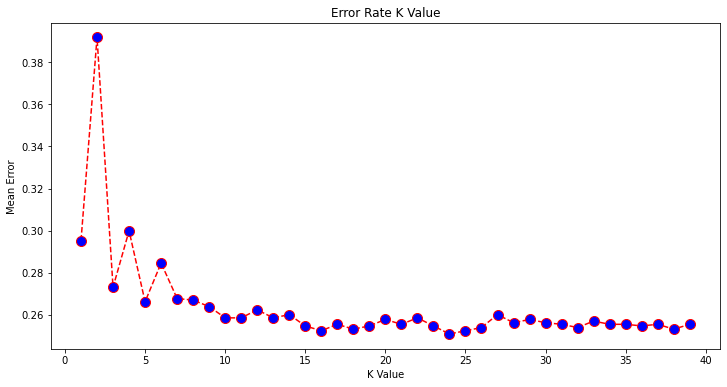

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')